## day 1 -Linear Regression

In [4]:
# import pandas as pd
print("Hello World")

Hello World


In [5]:
# installing libraries
# pandas -- > metrics se interaction
!pip install numpy pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import pandas as pd   # Data ko handle krne ka kaam data manipulation (crud and all) 
import numpy as np  # handles mathematical operations 
import matplotlib.pyplot as plt# used for visualization and ploting
from sklearn.datasets import load_diabetes # free dataset for learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
data = load_diabetes()
df = pd.DataFrame(data.data , columns = data.feature_names)
df["target"] = data.target   
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
x = df.drop(columns=["target"])
y = df["target"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape # show if the data is split properly or not

((353, 10), (89, 10), (353,), (89,))

In [11]:
## model training

In [17]:
model = LinearRegression()
model.fit(x_train , y_train)
# print('Coefficient:' model.coefficient)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)
pd.DataFrame({"Actual":y_test[:5].values, "Predicted":y_pred[:5]})

,Actual,Predicted
0,219.0,139.547558
1,70.0,179.517208
2,202.0,134.038756
3,230.0,291.417029
4,111.0,123.789659


In [24]:
mse = mean_squared_error(y_test, y_pred)
# Mean square error
r2 = r2_score(y_test, y_pred)
#calculate r^2
n = len(y_test)
p = x_test.shape[1]

adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print("Mean Squared Error(MSE):",mse)
print("R^2:",r2)
print("Adjusted R^2 score:",adj_r2)

Mean Squared Error(MSE): 2900.1936284934804
R^2: 0.4526027629719196
Adjusted R^2 score: 0.38242363001960167


## Plot the graph

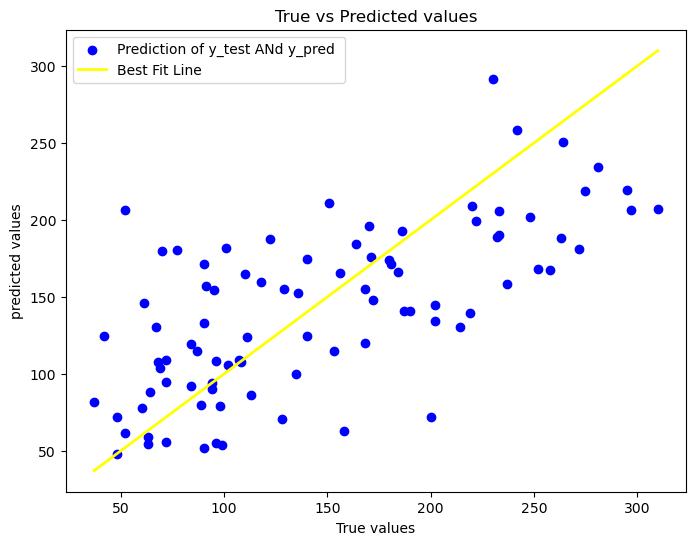

In [30]:
plt.figure(figsize = (8,6))
plt.scatter(y_test , y_pred , color = 'blue' , label = "Prediction of y_test ANd y_pred ")
plt.plot([y_test.min(), y_test.max()] , [y_test.min(), y_test.max()], color = 'Yellow' , lw = 2, label = "Best Fit Line")
plt.xlabel("True values")
plt.ylabel("predicted values")
plt.title("True vs Predicted values")
plt.legend()
plt.show()